In [1]:
cd ..

e:\GitHub\ppgc-uff-machine-learning


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data_folder = 'data'


In [4]:
occ = pd.read_csv(f"{data_folder}/Occupancy_Estimation.csv")

In [5]:
print(occ.info())
occ.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [6]:
occ.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [7]:
target_variable = "Room_Occupancy_Count"

In [8]:
occ = occ.drop(['Date','Time'], axis=1)
occ.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


data visualization

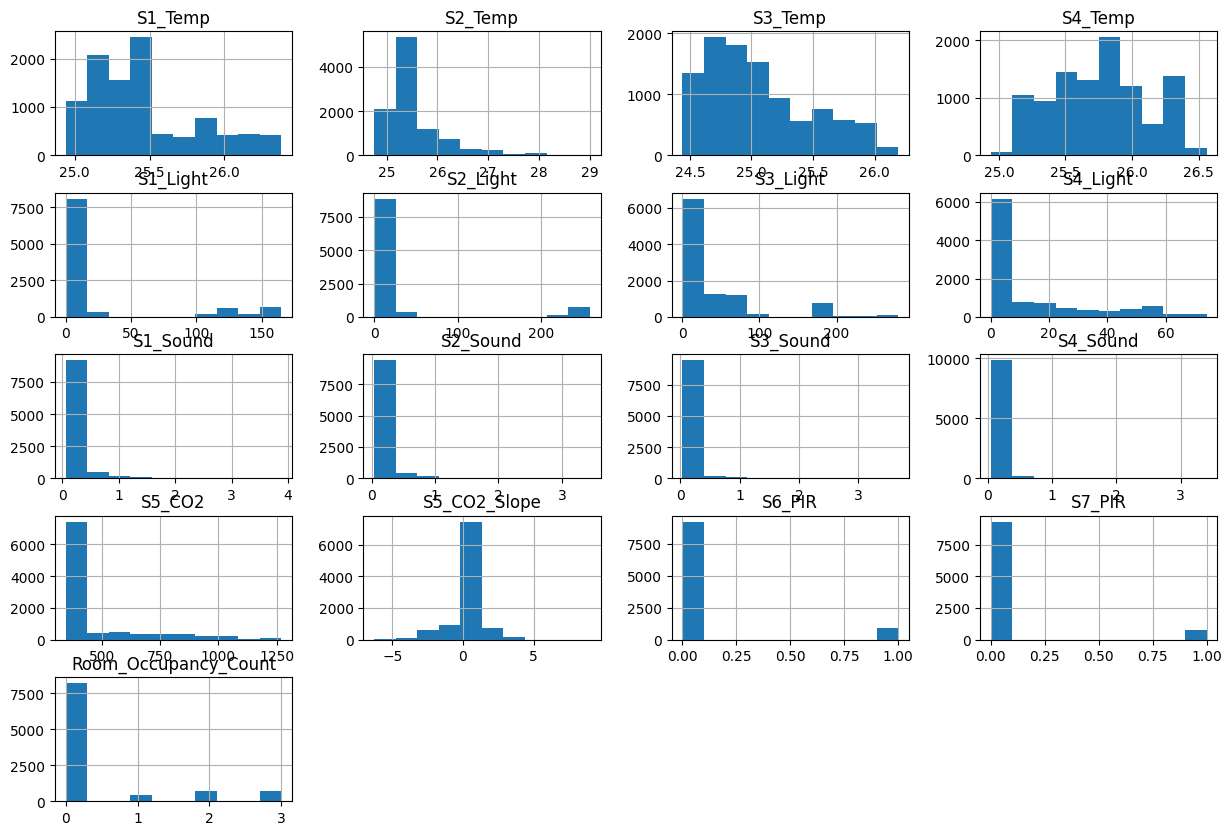

<Figure size 640x480 with 0 Axes>

In [9]:
occ.hist(figsize=(15,10), layout=(5,4))
_ = plt.figure()

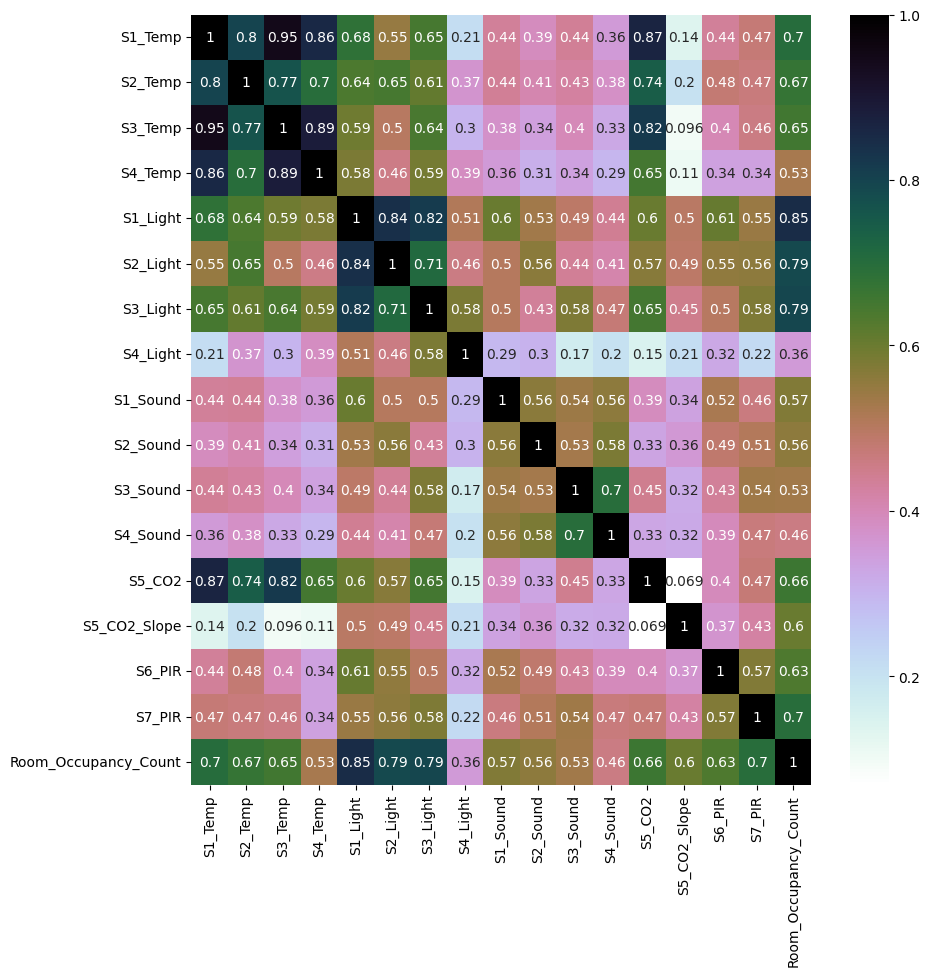

In [10]:
plt.figure(figsize=(10,10)) 
sns.heatmap(occ.corr(),annot=True,cmap='cubehelix_r')

plt.show()

Room_Occupancy_Count has a stronger correlation with the first three light sensors, the first temperature sensor and the second motion detection sensor.

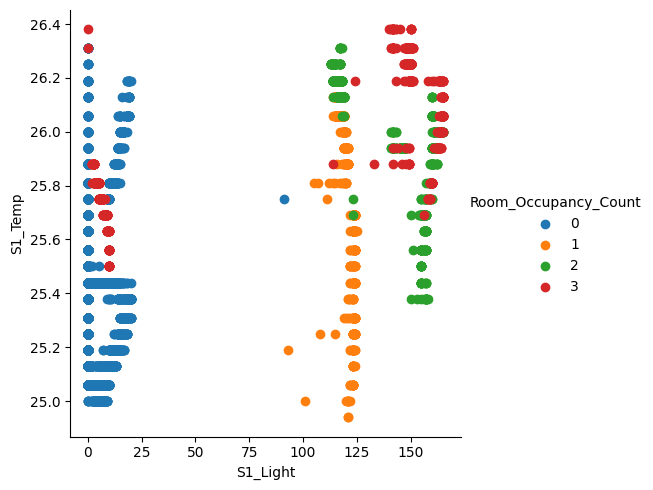

In [11]:
sns.FacetGrid(occ, hue=target_variable, height=5) \
   .map(plt.scatter, "S1_Light", "S1_Temp") \
   .add_legend()

plt.show()

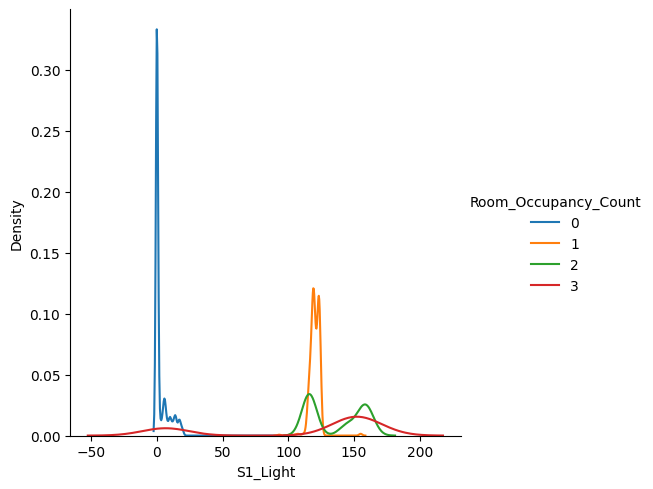

In [12]:
sns.FacetGrid(occ, hue=target_variable, height=5).map(sns.kdeplot, "S1_Light").add_legend()
plt.show()

Normalizing the data

In [13]:
sel_col = ['S1_Light','S2_Light','S3_Light','S1_Temp','S7_PIR']

In [14]:
column_data = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']

In [15]:
norm_occ = (occ[sel_col] - occ[sel_col].min())/(occ[sel_col].max() - occ[sel_col].min())
norm_occ[target_variable] = occ[target_variable]

In [16]:
norm_occ.info()
norm_occ.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Light              10129 non-null  float64
 1   S2_Light              10129 non-null  float64
 2   S3_Light              10129 non-null  float64
 3   S1_Temp               10129 non-null  float64
 4   S7_PIR                10129 non-null  float64
 5   Room_Occupancy_Count  10129 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 474.9 KB


,S1_Light,S2_Light,S3_Light,S1_Temp,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,0.154212,0.100838,0.122316,0.356953,0.079574,0.398559
std,0.309159,0.260869,0.208574,0.243993,0.270645,0.893633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.173611,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.305556,0.000000,0.000000
75%,0.072727,0.054264,0.178571,0.479167,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


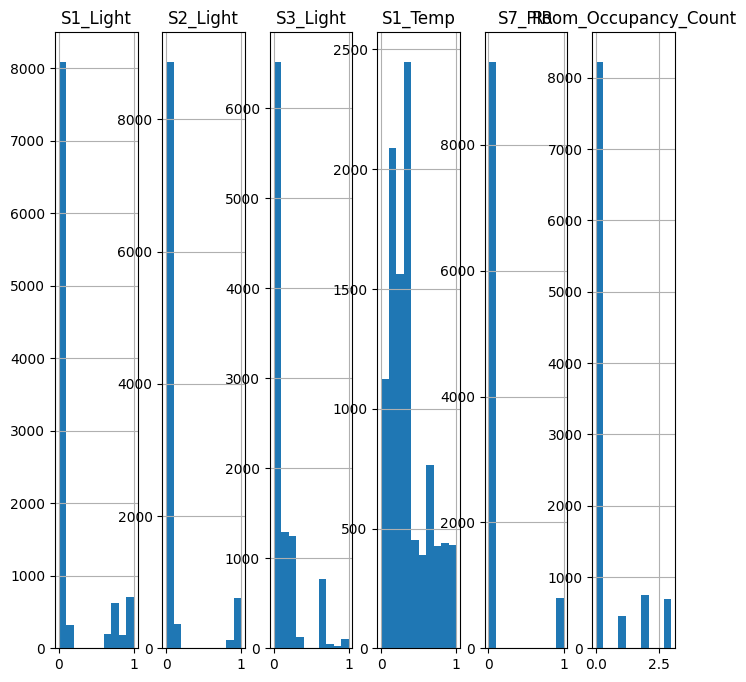

<Figure size 640x480 with 0 Axes>

In [17]:
norm_occ.hist(figsize=(8,8), layout=(1,6))
_ = plt.figure()

## Variable processing for classification

The selected columns will be each cut into a different number of bins:

S1_Light: 6

S2_Light: 4

S3_Light: 4 or 8

S1_Temp: 5 or 10

S7_PIR: keep as it is

In [18]:
norm_occ['s1l_bins'] = pd.cut(norm_occ.S1_Light, include_lowest=True, bins=[0.0,0.1,0.2,0.6,0.7,0.8,0.9,1])
norm_occ['s2l_bins'] = pd.cut(norm_occ.S2_Light, include_lowest=True, bins=[0.0,0.1,0.2,0.8,0.9,1])
norm_occ['s3l_bins'] = pd.cut(norm_occ.S3_Light, include_lowest=True, bins=[0.0,0.2,0.4,0.6,0.8,1])
norm_occ['s1t_bins'] = pd.cut(norm_occ.S1_Temp, include_lowest=True, bins=[0.0,0.2,0.4,0.6,0.8,1])
norm_occ['s7p_bins'] = pd.cut(norm_occ.S7_PIR, include_lowest=True, bins=[0.0,0.5,1])
norm_occ.info()
norm_occ.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   S1_Light              10129 non-null  float64 
 1   S2_Light              10129 non-null  float64 
 2   S3_Light              10129 non-null  float64 
 3   S1_Temp               10129 non-null  float64 
 4   S7_PIR                10129 non-null  float64 
 5   Room_Occupancy_Count  10129 non-null  int64   
 6   s1l_bins              10129 non-null  category
 7   s2l_bins              10129 non-null  category
 8   s3l_bins              10129 non-null  category
 9   s1t_bins              10129 non-null  category
 10  s7p_bins              10129 non-null  category
dtypes: category(5), float64(5), int64(1)
memory usage: 525.7 KB


,S1_Light,S2_Light,S3_Light,S1_Temp,S7_PIR,Room_Occupancy_Count,s1l_bins,s2l_bins,s3l_bins,s1t_bins,s7p_bins
0,0.733333,0.131783,0.189286,0.000000,0.0,1,"(0.7, 0.8]","(0.1, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.5]"
1,0.733333,0.127907,0.189286,0.000000,0.0,1,"(0.7, 0.8]","(0.1, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.5]"
2,0.733333,0.131783,0.189286,0.041667,0.0,1,"(0.7, 0.8]","(0.1, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.5]"
3,0.733333,0.131783,0.189286,0.041667,0.0,1,"(0.7, 0.8]","(0.1, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.5]"
4,0.733333,0.131783,0.192857,0.041667,0.0,1,"(0.7, 0.8]","(0.1, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.5]"


In [19]:
fact_columns = ['s1l_bins','s2l_bins','s3l_bins','s1t_bins','s7p_bins']
dt_fact = []
for col in fact_columns:
    label, val = pd.factorize(norm_occ[col])
    dt_fact.append(col+'_fact')
    norm_occ[col+'_fact'] = label

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

### k-NN

In [29]:
seed = 13
train_test_columns = sel_col

knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(norm_occ[train_test_columns], norm_occ[target_variable], random_state=seed, test_size=0.25, stratify=norm_occ[target_variable])
print("Test set X", knn_X_test.shape)
print("Test set y", knn_y_test.shape)

Test set X (2533, 5)
Test set y (2533,)


In [38]:
from sklearn.neighbors import KNeighborsClassifier

params = {  'n_neighbors': [x for x in range(5,31)],
            'weights': ['uniform','distance'],
            'p': [1,2]}

knn = KNeighborsClassifier(n_jobs=8)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

grid_search = GridSearchCV(knn, param_grid=params, return_train_score=True, scoring='accuracy', cv=skf.split(knn_X_train, knn_y_train))
grid_search.fit(knn_X_train, knn_y_train)

print('Best Hyperparameters:')
print(grid_search.best_params_)

cv_results = pd.DataFrame(grid_search.cv_results_)
print("Average Score on train set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))
print("Average Score on validation set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_test_score.values[0])) 

Best Hyperparameters:
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Average Score on train set: 1.000 +/- 0.000
Average Score on validation set: 0.996 +/- 0.002


In [39]:
knn_best = KNeighborsClassifier(    n_jobs=8,
                                    n_neighbors=grid_search.best_params_['n_neighbors'],
                                    weights=grid_search.best_params_['weights'],
                                    p=grid_search.best_params_['p'])

knn_best.fit(knn_X_train, knn_y_train)

y_pred = knn_best.predict(knn_X_test)

print("Train set accuracy: {:.3f}".format(knn_best.score(knn_X_train, knn_y_train)))
print("Validation set accuracy: {:.3f}".format(knn_best.score(knn_X_test, knn_y_test)))
print(classification_report(knn_y_test, y_pred))
print(confusion_matrix(knn_y_test, y_pred))
print("Accuracy: {:.3f}".format(accuracy_score(knn_y_test, y_pred)))

Train set accuracy: 0.999
Validation set accuracy: 0.995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       0.98      1.00      0.99       115
           2       0.97      0.96      0.97       187
           3       0.97      0.97      0.97       173

    accuracy                           1.00      2533
   macro avg       0.98      0.98      0.98      2533
weighted avg       1.00      1.00      1.00      2533

[[2058    0    0    0]
 [   0  115    0    0]
 [   0    2  180    5]
 [   0    0    5  168]]
Accuracy: 0.995


### Decision Tree

In [40]:
train_test_columns = dt_fact
# train_test_columns = sel_col
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(norm_occ[train_test_columns], norm_occ[target_variable], random_state=seed, test_size=0.25, stratify=norm_occ[target_variable])
print("Test set X", dt_X_test.shape)
print("Test set y", dt_y_test.shape)

Test set X (2533, 5)
Test set y (2533,)


In [41]:
from sklearn.tree import DecisionTreeClassifier

params = {  'criterion': ['entropy'],
            'max_depth': [x for x in range(2,6)],
            'min_samples_split': [x for x in range(2,8)],
            'min_samples_leaf': [x for x in range(1,8)]}

tree_fact = DecisionTreeClassifier(random_state=seed)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

grid_search = GridSearchCV(tree_fact, param_grid=params, return_train_score=True, scoring='accuracy', cv=skf.split(dt_X_train, dt_y_train))

grid_search.fit(dt_X_train, dt_y_train)

print('Best Hyperparameters:')
print(grid_search.best_params_)
cv_results = pd.DataFrame(grid_search.cv_results_)
print("Average Score on train set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))
print("Average Score on validation set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_test_score.values[0])) 

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Average Score on train set: 0.989 +/- 0.000
Average Score on validation set: 0.988 +/- 0.002


In [42]:
tree_best = DecisionTreeClassifier( random_state=seed,
                                    max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

tree_best.fit(dt_X_train, dt_y_train)

y_pred = tree_best.predict(dt_X_test)

print("Train set accuracy: {:.3f}".format(tree_best.score(dt_X_train, dt_y_train)))
print("Validation set accuracy: {:.3f}".format(tree_best.score(dt_X_test, dt_y_test)))
print(classification_report(dt_y_test, y_pred))
print(confusion_matrix(dt_y_test, y_pred))
print("Accuracy: {:.3f}".format(accuracy_score(dt_y_test, y_pred)))

Train set accuracy: 0.989
Validation set accuracy: 0.992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       1.00      1.00      1.00       115
           2       0.99      0.95      0.97       187
           3       0.95      0.94      0.94       173

    accuracy                           0.99      2533
   macro avg       0.98      0.97      0.98      2533
weighted avg       0.99      0.99      0.99      2533

[[2058    0    0    0]
 [   0  115    0    0]
 [   0    0  178    9]
 [  10    0    1  162]]
Accuracy: 0.992


## Naive Bayes